# 7.2.6 Arbol de decisión para regresión

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
from sklearn.datasets import load_diabetes
from sklearn.tree import DecisionTreeRegressor

import warnings
warnings.filterwarnings("ignore")

In [23]:
X, y = load_diabetes(return_X_y=True)

In [24]:
decisionTreeRegressor = DecisionTreeRegressor(
    # --------------------------------------------------------------------------
    # The function to measure the quality of a split.
    # * 'squared_error': is equal to variance reduction as feature selection
    #    criterion and minimizes the L2 loss using the mean of each terminal
    #    node
    # * 'friedman_mse': which uses mean squared error with Friedman’s
    #   improvement score for potential splits
    # * 'absolute_error': for the mean absolute error, which minimizes the
    #   L1 loss using the median of each terminal node
    # * 'poisson': which uses reduction in Poisson deviance to find splits.
    criterion="squared_error",
    # --------------------------------------------------------------------------
    #
    #    El resto de parámetros fueron discutidos en DecisionTreeClassifier
    #
    # --------------------------------------------------------------------------
    # The strategy used to choose the split at each node. Supported strategies
    # are “best” to choose the best split and “random” to choose the best
    # random split.
    splitter="best",
    # --------------------------------------------------------------------------
    # The maximum depth of the tree. If None, then nodes are expanded until all
    # leaves are pure or until all leaves contain less than min_samples_split
    # samples.
    max_depth=None,
    # --------------------------------------------------------------------------
    # The minimum number of samples required to split an internal node:
    # * If int, then consider min_samples_split as the minimum number.
    # * If float, then min_samples_split is a fraction and
    #   ceil(min_samples_split * n_samples) are the minimum number of samples
    #   for each split.
    min_samples_split=2,
    # --------------------------------------------------------------------------
    # The minimum number of samples required to be at a leaf node. A split
    # point at any depth will only be considered if it leaves at least
    # min_samples_leaf training samples in each of the left and right branches.
    # This may have the effect of smoothing the model, especially in
    # regression.
    # * If int, then consider min_samples_leaf as the minimum number.
    # * If float, then min_samples_leaf is a fraction and
    #   ceil(min_samples_leaf * n_samples) are the minimum number of samples
    #   for each node.
    min_samples_leaf=1,
    # --------------------------------------------------------------------------
    # The minimum weighted fraction of the sum total of weights (of all the
    # input samples) required to be at a leaf node. Samples have equal weight
    # when sample_weight is not provided.
    min_weight_fraction_leaf=0.0,
    # --------------------------------------------------------------------------
    # The number of features to consider when looking for the best split:
    # * If int, then consider max_features features at each split.
    # * If float, then max_features is a fraction and
    #   max(1, int(max_features * n_features_in_)) features are considered at
    #   each split.
    # * If “sqrt”, then max_features=sqrt(n_features).
    # * If “log2”, then max_features=log2(n_features).
    # * If None, then max_features=n_features.
    max_features=None,
    # --------------------------------------------------------------------------
    # Controls the randomness of the estimator. The features are always
    # randomly permuted at each split, even if splitter is set to "best". When
    # max_features < n_features, the algorithm will select max_features at
    # random at each split before finding the best split among them. But the
    # best found split may vary across different runs, even if
    # max_features=n_features. That is the case, if the improvement of the
    # criterion is identical for several splits and one split has to be
    # selected at random. To obtain a deterministic behaviour during fitting,
    # random_state has to be fixed to an integer.
    random_state=None,
    # --------------------------------------------------------------------------
    # Grow a tree with max_leaf_nodes in best-first fashion. Best nodes are
    # defined as relative reduction in impurity. If None then unlimited number
    # of leaf nodes.
    max_leaf_nodes=None,
    # --------------------------------------------------------------------------
    # A node will be split if this split induces a decrease of the impurity
    # greater than or equal to this value.
    #
    # The weighted impurity decrease equation is the following:
    #
    #   N_t / N * (impurity - N_t_R / N_t * right_impurity
    #                       - N_t_L / N_t * left_impurity)
    #
    # where N is the total number of samples, N_t is the number of samples at
    # the current node, N_t_L is the number of samples in the left child, and
    # N_t_R is the number of samples in the right child.
    #
    # N, N_t, N_t_R and N_t_L all refer to the weighted sum, if sample_weight
    # is passed.
    min_impurity_decrease=0.0,
    # --------------------------------------------------------------------------
    # Complexity parameter used for Minimal Cost-Complexity Pruning. The
    # subtree with the largest cost complexity that is smaller than ccp_alpha
    # will be chosen. By default, no pruning is performed.
    ccp_alpha=0.0,
)

decisionTreeRegressor.fit(X, y)
decisionTreeRegressor.score(X, y)

1.0

In [25]:
decisionTreeRegressor.predict(X)

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [26]:
feature_importances = decisionTreeRegressor.feature_importances_

In [27]:
for i, importance in enumerate(feature_importances):
    print(f"Feature {i + 1}: {importance}")

Feature 1: 0.03834344454483086
Feature 2: 0.00995446535943356
Feature 3: 0.23666714090009566
Feature 4: 0.08280410704954506
Feature 5: 0.07773563915220064
Feature 6: 0.05774873356238651
Feature 7: 0.07297768049628997
Feature 8: 0.013246571076131234
Feature 9: 0.34254502389710406
Feature 10: 0.06797719396198248


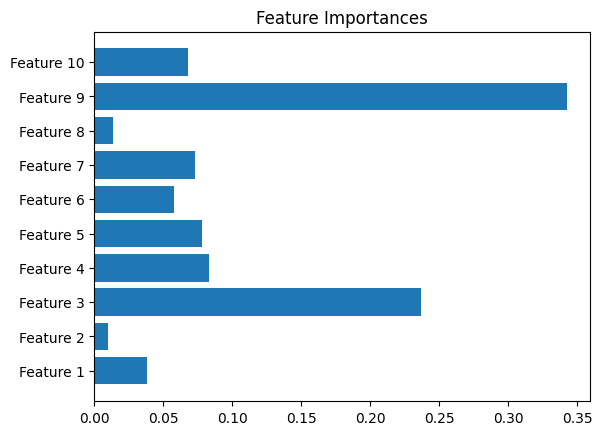

In [28]:
import matplotlib.pyplot as plt
# Plot the feature importances
plt.barh(range(len(feature_importances)), feature_importances, tick_label=[f"Feature {i + 1}" for i in range(len(feature_importances))])
plt.title("Feature Importances")
plt.show()

In [29]:
from sklearn.metrics import r2_score
# Calcular el puntaje (score), en este caso el coeficiente de determinación (R^2)
y_pred = decisionTreeRegressor.predict(X)
r2 = r2_score(y, y_pred)
print(f"R^2 Score: {r2}")

R^2 Score: 1.0


In [30]:
print('ok_')

ok_
